# TimeGAN Implementation

## Time-series Generative Adversarial Networks

Time-series synthetic data generation application using timeGAN framework.

In [1]:
import os
from settings import PROJECT_ROOT
os.chdir(PROJECT_ROOT)

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pickle
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

from model_core.gan.timegan import timegan
import tensorflow as tf

from Data.Code.pc_data_gan import load_and_preprocess

# from metrics.discriminative_metrics import discriminative_score_metrics
# from metrics.predictive_metrics import predictive_score_metrics
from model_core.gan.metrics.visualization_metrics import visualization

In [3]:
seq_len = 24 #Use expert judgement - memory parameter
eth_data = load_and_preprocess('first_preprocess/eth/eth_data_hourly_ema.pk', seq_len)

                     eth_n_blocks  eth_diffiulty_sum  eth_gaslimit_sum  \
time                                                                     
2016-05-18 00:00:00    253.000000       9.619558e+15      1.192234e+09   
2016-05-18 01:00:00    243.000000       9.204182e+15      1.145110e+09   
2016-05-18 02:00:00    247.428044       9.353798e+15      1.165991e+09   
2016-05-18 17:00:00    244.395755       9.239588e+15      1.151698e+09   
2016-05-18 18:00:00    245.764279       9.297980e+15      1.158145e+09   
...                           ...                ...               ...   
NaT                    199.935483       1.704748e+15      6.281161e+08   
NaT                    201.641935       1.722439e+15      6.334771e+08   
NaT                    204.977741       1.751742e+15      6.439568e+08   
NaT                    204.279967       1.745523e+15      6.417646e+08   
NaT                    206.551971       1.764376e+15      6.489023e+08   

                     eth_gasused_sum 

## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [4]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [5]:
# Run TimeGAN
tf.compat.v1.disable_eager_execution()
generated_data = timegan(eth_data, parameters)   
print('Finish Synthetic Data Generation')

(37020, 24, 16)
no: 37020
seq len: 24
dim: 16
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Start Embedding Network Training
step: 0/10000, e_loss: 0.3946
step: 1000/10000, e_loss: 0.0622
step: 2000/10000, e_loss: 0.0446
step: 3000/10000, e_loss: 0.0341
step: 4000/10000, e_loss: 0.0284
step: 5000/10000, e_loss: 0.0342
step: 6000/10000, e_loss: 0.0257
step: 7000/10000, e_loss: 0.0247
step: 8000/10000, e_loss: 0.023
step: 9000/10000, e_loss: 0.0199
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.2986
step: 1000/10000, s_loss: 0.0266
step: 2000/10000, s_loss: 0.0177
step: 3000/10000, s_loss: 0.014
step: 4000/10000, s_loss: 0.0114
step: 5000/10000, s_loss: 0

In [17]:
date = dt.datetime.now()
with open('Data/generated_data ' + str(date) +'.pkl', 'wb') as f:
    pickle.dump(generated_data, f)

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [6]:
# metric_iteration = 5

# discriminative_score = list()
# for _ in range(metric_iteration):
#   temp_disc = discriminative_score_metrics(ori_data, generated_data)
#   discriminative_score.append(temp_disc)

# print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [7]:
# predictive_score = list()
# for tt in range(metric_iteration):
#   temp_pred = predictive_score_metrics(eth_data, generated_data)
#   predictive_score.append(temp_pred)   
    
# print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

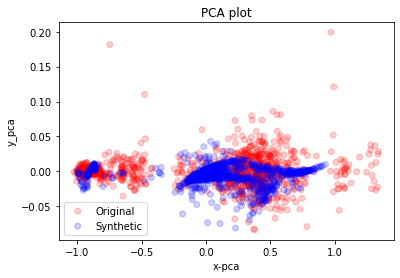

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.018244
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.529198
[t-SNE] KL divergence after 300 iterations: 0.738213


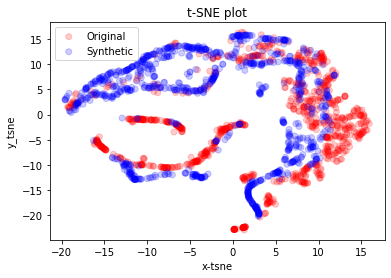

In [8]:
visualization(eth_data, generated_data, 'pca')
visualization(eth_data, generated_data, 'tsne')